# **GC 7 | WEEK 1 | PHASE 2**

## **i. Perkenalan**

Nama = Muhammad Ashar Ihsan

Batch = 035

Dataset = [Bags Dataset](https://www.kaggle.com/datasets/vencerlanz09/plastic-paper-garbage-bag-synthetic-images/data)

Objective = Membuat sebuah model machine learning dengan computer vision untuk mendeteksi mana yang merupakan kantong plastik, paper bag, dan juga kantong sampah. Tingkat pemilahan sampah di masyarakat masih sangat rendah contohnya dijakarta banyak warga yang belum memahami pentingnya memilah sampah dan jenis-jenis sampah yang dapat didaur ulang. Akibatnya, sebagian besar sampah tercampur dan berakhir di TPA yang selanjutnya menimbulkan berbagai masalah seperti pencemaran lingkungan dan juga penumpukan sampah yang semakin besar tiap tahunnya.

Justifikasi:
- https://megapolitan.kompas.com/read/2024/03/31/10584731/jakarta-darurat-sampah-pengamat-minta-pembangunan-itf-sunter-dilanjut (darurat penumpukan sampah)
- https://communication.binus.ac.id/2023/12/13/pentingnya-daur-ulang-sampah-bagi-masa-depan-lingkungan-yang-lebih-baik/ (pentingnya daur ulang)
- https://repurpose-global.translate.goog/blog/post/how-does-plastic-cause-air-pollution?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc (sampah plastic penyebab polusi)


## **ii. Import Libraries**

In [1]:
# Downgrade version of TensorFlow and tf-keras

!pip install --upgrade "tensorflow<2.16" "tf-keras<2.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled ke

In [ ]:
!pip install split-folders

# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import splitfolders
import pickle
import os
import cv2
import glob
from PIL import Image
import seaborn as sns
from skimage import io
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras import Model
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## **iii. Data Loading**

In [3]:
# List image tiap kategori
garbage_files = glob.glob('/content/Dataset/GarbageBag/*')
paper_files = glob.glob('/content/Dataset/PaperBag/*')
plastic_files = glob.glob('/content/Dataset/PlasticBag/*')

# Create an 'input' directory to structure your data
input_folder = 'Dataset'

# Copy files into the respective class folders within the 'input' directory Copy file ke tiap-tiap folder class yang ada di folder dataset
for file in garbage_files:
    os.rename(file, os.path.join(input_folder, 'GarbageBag', os.path.basename(file)))
for file in paper_files:
    os.rename(file, os.path.join(input_folder, 'PaperBag', os.path.basename(file)))
for file in plastic_files:
    os.rename(file, os.path.join(input_folder, 'PlasticBag', os.path.basename(file)))

# Split the data into train, validation, and test sets
splitfolders.ratio(input_folder, output="dataset_dibagi", seed=1337, ratio=(.7, .15, .15))

Copying files: 1500 files [00:00, 5101.48 files/s]


In [4]:
# definisikan path dari train, test, dan val
train_path = '/content/dataset_dibagi/train'
test_path = '/content/dataset_dibagi/test'
val_path = '/content/dataset_dibagi/val'

## **iv. Exploratory Data Analysis (EDA)**

In [38]:
# buat membuat seluruh data kedalam bentuk list
Garbage = glob.glob('/content/Dataset/GarbageBag/*')
Paper = glob.glob('/content/Dataset/PaperBag/*')
Plastic = glob.glob('/content/Dataset/PlasticBag/*')

Garbage.sort()
Paper.sort()
Plastic.sort()

print('Garbage Bag : ', Garbage)
print('')
print('Paper Bag : ', Paper)
print('')
print('Plastic Bag : ', Plastic)

Garbage Bag :  ['/content/input_data/GarbageBag/00000000.jpg', '/content/input_data/GarbageBag/00000001.jpg', '/content/input_data/GarbageBag/00000002.jpg', '/content/input_data/GarbageBag/00000003.jpg', '/content/input_data/GarbageBag/00000004.jpg', '/content/input_data/GarbageBag/00000005.jpg', '/content/input_data/GarbageBag/00000006.jpg', '/content/input_data/GarbageBag/00000007.jpg', '/content/input_data/GarbageBag/00000008.jpg', '/content/input_data/GarbageBag/00000009.jpg', '/content/input_data/GarbageBag/00000010.jpg', '/content/input_data/GarbageBag/00000011.jpg', '/content/input_data/GarbageBag/00000012.jpg', '/content/input_data/GarbageBag/00000013.jpg', '/content/input_data/GarbageBag/00000014.jpg', '/content/input_data/GarbageBag/00000015.jpg', '/content/input_data/GarbageBag/00000016.jpg', '/content/input_data/GarbageBag/00000017.jpg', '/content/input_data/GarbageBag/00000018.jpg', '/content/input_data/GarbageBag/00000019.jpg', '/content/input_data/GarbageBag/00000020.jpg

In [39]:
# satukan semua class untuk dijadikan satu dataframe agar dapat kita analisis
all_files = Garbage + Paper + Plastic
labels = ['GarbageBag' for i in range(len(Garbage))] + ['PaperBag' for i in range(len(Paper))] + ['PlasticBag' for i in range(len(Plastic))]
img_df = pd.DataFrame({'images':all_files, 'label':labels})
img_df = img_df.sample(len(img_df)).reset_index(drop=True)
img_df

,images,label
0,/content/input_data/GarbageBag/00000033.jpg,GarbageBag
1,/content/input_data/PaperBag/00000117.jpg,PaperBag
2,/content/input_data/PaperBag/00000448.jpg,PaperBag
3,/content/input_data/GarbageBag/00000058.jpg,GarbageBag
4,/content/input_data/PlasticBag/00000352.jpg,PlasticBag
...,...,...
1495,/content/input_data/GarbageBag/00000039.jpg,GarbageBag
1496,/content/input_data/GarbageBag/00000434.jpg,GarbageBag
1497,/content/input_data/PaperBag/00000473.jpg,PaperBag
1498,/content/input_data/PlasticBag/00000239.jpg,PlasticBag


**images**: merupakan file path dari gambar.

**Label**: Mewakili class gambar. Ada 3 kelas dalam kumpulan data ini: PlasticBag, PaperBag, dan GarbageBag.

GarbageBag: 500 gambar
PaperBag: 500 gambar
PlasticBag: 500 gambar


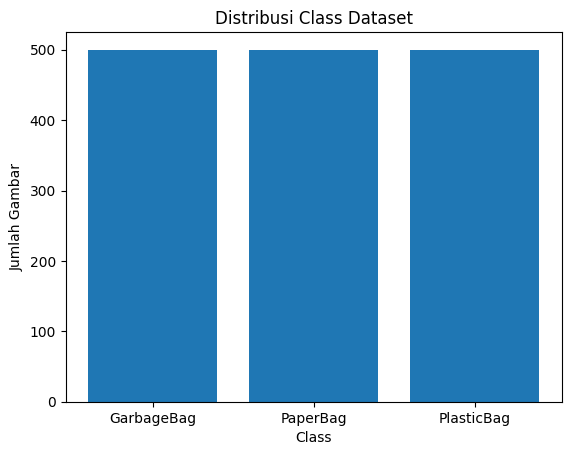

In [40]:
# Hitung jumlah gambar di setiap class
class_names = ['GarbageBag', 'PaperBag', 'PlasticBag']
class_counts = {}

for class_name in class_names:
    class_files = img_df[img_df['label'] == class_name]['images'].tolist()
    class_counts[class_name] = len(class_files)

# Tampilkan jumlah gambar per class
for class_name, count in class_counts.items():
    print(f'{class_name}: {count} gambar')

# Visualisasi dengan bar chart
plt.bar(class_names, class_counts.values())
plt.title('Distribusi Class Dataset')
plt.xlabel('Class')
plt.ylabel('Jumlah Gambar')
plt.show()

Diatas kita dapat melihat bahwa kelas-kelas tersebut balance. Hal ini bagus karena kita tidak perlu melakukan handling class balancing.

In [5]:
#  buat fuction untuk visualisasi 5 image pertama tiap class

def plot_images(path):
  labels = os.listdir(path)
  for label in labels:
    folder_path = os.path.join(path, label)
    fig = plt.figure(figsize=(20, 20))
    columns = 5
    rows = 1
    print('Class : ', label)
    images = os.listdir(folder_path)
    for index in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, index)
        image = plt.imread(os.path.join(folder_path, images[index]))
        plt.imshow(image)
        plt.axis("off")
    plt.show()

Class :  PlasticBag


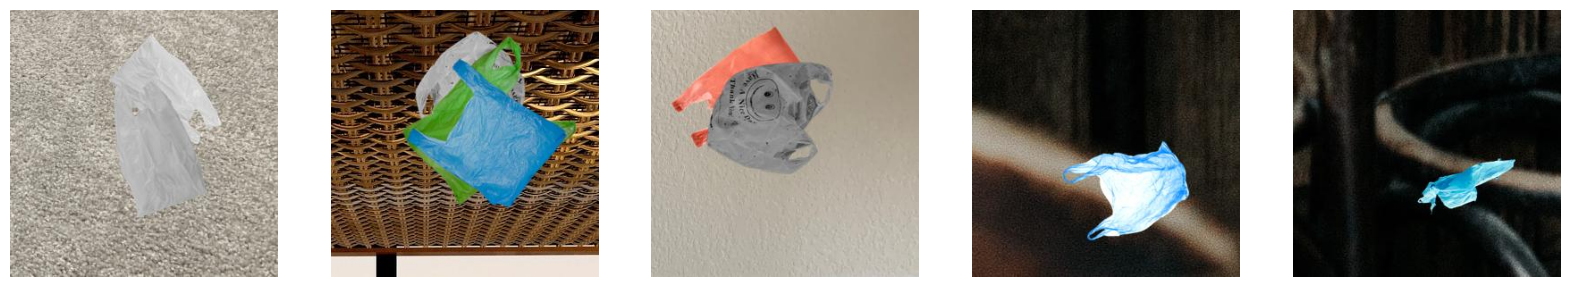

Class :  PaperBag


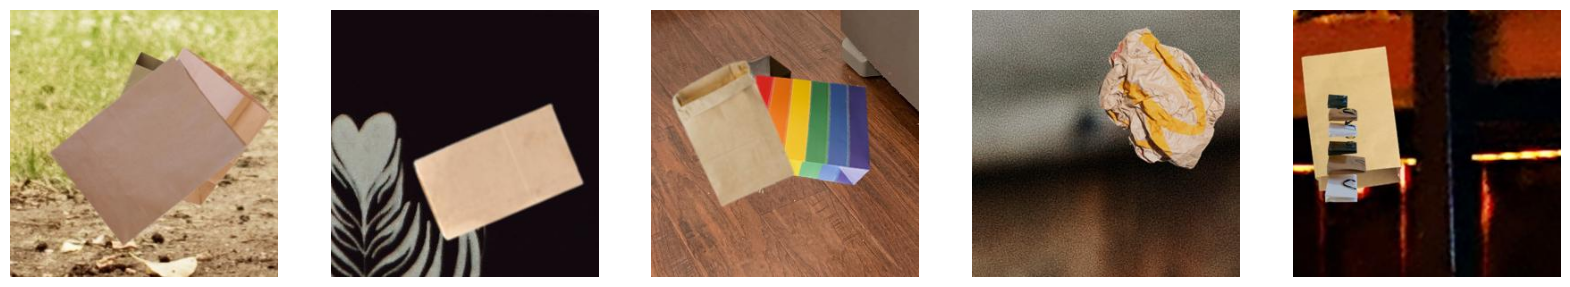

Class :  GarbageBag


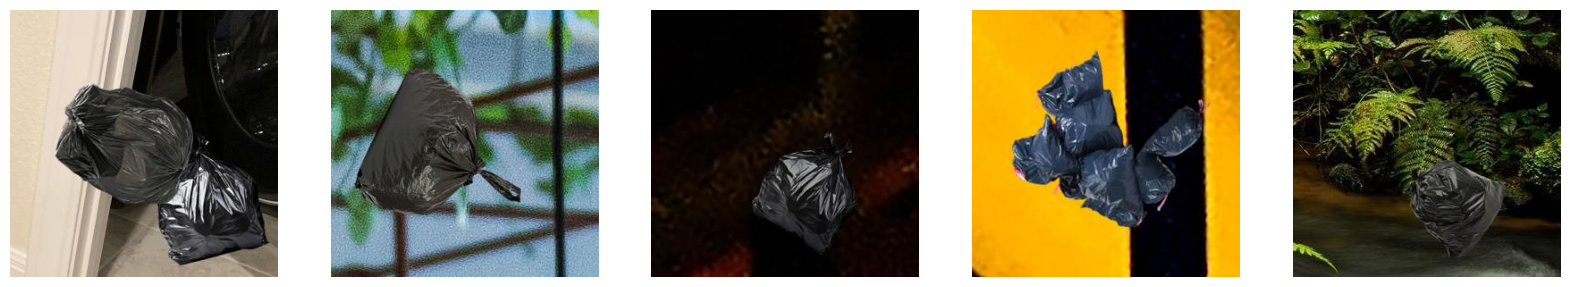

In [6]:
# Visualization train_path

plot_images(train_path)

Dari gambar acak di atas, kita dapat melihat beberapa karakteristik gambar untuk setiap kelas:

- PaperBag: Gambar sebagian besar berwarna cokelat dan berbentuk persegi panjang. Posisi gambar sangat acak. Beberapa gambar diputar dan beberapa tidak. Beberapa gambar juga dibalik secara horizontal dan vertikal. Kita bisa menggunakan data augmentation untuk membalik gambar secara horizontal dan vertikal sehingga model dapat mempelajari gambar dengan lebih baik.

- PlasticBag: Gambar sebagian besar memiliki warna yang bervariasi (biru, putih, merah, dll.) dan juga berbentuk persegi panjang tetapi memiliki sedikit pegangan untuk dipegang. Posisi gambar sangat acak. Beberapa gambar diputar dan beberapa tidak. Beberapa gambar juga dibalik secara horizontal dan vertikal. Kurang lebih sama seperti PaperBag kita bisa membalik gambar agar model bisa lebih mudah dalam mempelajari pola gambar.

- GarbageBag: Gambar sebagian besar berwarna hitam dan berbentuk lebih bulat dibandingkan dengan kelas lainnya. Posisi gambar sangat acak. Beberapa gambar diputar dan beberapa tidak. Beberapa gambar juga dibalik secara horizontal dan vertikal.

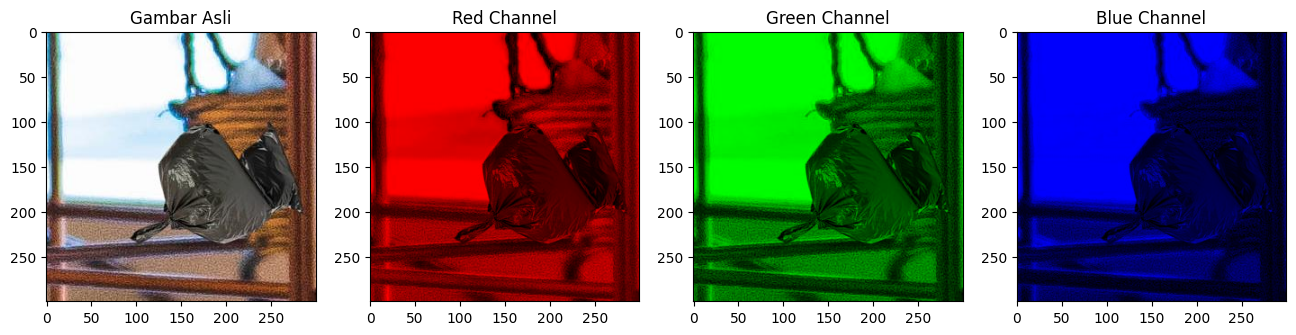

In [43]:
# function untuk cek colorspace
def check_colorspace(image_path):
    try:
        img = cv2.imread(image_path)
        if img is not None:
            b, g, r = cv2.split(img)

            # Menampilkan gambar asli
            fig, axes = plt.subplots(1, 4, figsize=(16, 4))
            axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[0].set_title('Gambar Asli')

            # Membuat gambar baru untuk setiap channel dengan warna asli
            img_r = np.zeros_like(img)
            img_r[:, :, 2] = r

            img_g = np.zeros_like(img)
            img_g[:, :, 1] = g

            img_b = np.zeros_like(img)
            img_b[:, :, 0] = b

            # Channel terpisah di kolom selanjutnya
            axes[1].imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
            axes[1].set_title('Red Channel')
            axes[2].imshow(cv2.cvtColor(img_g, cv2.COLOR_BGR2RGB))
            axes[2].set_title('Green Channel')
            axes[3].imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB))
            axes[3].set_title('Blue Channel')

            plt.show()
        else:
            print(f"Error: Tidak dapat membaca gambar dari {image_path}")
    except Exception as e:
        print(f"Error: Tidak dapat membaca gambar dari {image_path}: {e}")

image_path = img_df['images'][0]  # Mengambil path gambar pertama dari DataFrame
check_colorspace(image_path)

Karena gambar berhasil menampilkan warna dengan benar sesuai dengan channel yang ditentukan, maka dapat disimpulkan bahwa colorspace gambar tersebut memang merupakan RGB.

## **v. Feature Engineering**

### **v.1 Preprocessing Model Pertama**

Dibawah ini merupakan preprocessing untuk model ANN Training kita.

In [7]:
# Define hyperparameters
img_height= 224
img_width= 224
batch_size= 32

Pemilihan height dan widht 224 karena ukuran gambar tersebut saya lihat cukup umum digunakan dalam banyak model pretrained seperti VGG16 (yang mana akan kita gunakan di model improvement nanti). Dan kenapa batch size nya 32 menurut saya nilai nya cukup seimbang tidak terlalu kecil maupun terlalu besar.

Dibawah kita akan langsung menggunakan data augmentation, seperti yang didapat dari EDA tadi bahwa dataset kita memiliiki gambar dengan posisi objek yang berantakan, contohnya ada yang terbalik atapun ada yang kecil, dan lain-lain. Dengan begitu dibawah beberapa Augmentasi yang saya masukkan untuk membuat model lebih bisa memahami pola dari gambar yang ada pada dataset kita.

In [8]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                    rotation_range=20, # Memutar gambar untuk menangani variasi orientasi objek
                                                                    zoom_range=0.05, # Memperbesar/memperkecil gambar untuk menangani variasi ukuran objek
                                                                    width_shift_range=0.05, # Menggeser gambar horizontal untuk menangani variasi posisi objek
                                                                    height_shift_range=0.05, # Menggeser gambar vertikal untuk menangani variasi posisi objek
                                                                    shear_range=0.05, # Menerapkan shear untuk menangani perspektif jika gambar terditorsi
                                                                    horizontal_flip=True, # Membalik gambar untuk meningkatkan variasi data dan menangani flipping
                                                                    validation_split=0.6)

train_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                      target_size=(img_height,img_width),
                                                      class_mode='sparse', # Jenis label (sparse untuk indeks kelas integer)
                                                      subset='training', # Menunjukkan bahwa generator ini untuk data pelatihan
                                                      batch_size=batch_size, # Jumlah sampel per batch data
                                                      shuffle=True, # Mengacak data pelatihan sebelum setiap epoch
                                                      seed=2) # Menetapkan seed untuk generator bilangan acak

val_set_aug = train_datagen_aug.flow_from_directory(val_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='validation',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)  # Menskalakan nilai piksel gambar dari rentang 0-255 menjadi 0-1

test_set_aug = test_datagen_aug.flow_from_directory(test_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=2)

Found 420 images belonging to 3 classes.
Found 135 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


### **v.2 Preprocessing Model Kedua**



Berikut merupakan preprocessing untuk model improvement kita. Perlu diingat bahwa run preprocessing ke 2 ini saat ketika ingin run model yang ke 2 atau ANN Improvement.

In [13]:
# Define hyperparameters

img_height= 224
img_width= 224
batch_size= 64

Perbedaan hyperparameters dari model sebelumnya hanya terletak pada batch sizenya, VGG16 adalah model yang cukup besar dan kompleks. Saya rasa dengan menggunakan batch_size 64 atau lebih besar, gradien yang dihitung selama pelatihan akan lebih stabil dan representatif dari keseluruhan dataset. Ini dapat menghasilkan proses pelatihan yang lebih lancar dan konvergensi yang lebih baik.

In [14]:
# membuat pretrained model menggunakan VGG16
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))
pretrained_model.trainable = False

In [15]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                   zoom_range=0.05,
                                                                   width_shift_range=0.05,
                                                                   height_shift_range=0.05,
                                                                   shear_range=0.05,
                                                                   horizontal_flip=True,
                                                                   validation_split=0.3, # perbedaan hanya terletak pada val_split, disini dipilih 0.3 karena saya ingin mengambil data val 300 sudah cukup
                                                                   preprocessing_function=preprocess_input)

train_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='training',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

val_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  subset='validation',
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  seed=2)

test_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_set_tl = test_datagen_tl.flow_from_directory(test_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=2)

Found 735 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


## **vi. ANN Training (Sequential API)**

### **vi.1 Model Definition**

In [9]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API model

model_aug = Sequential()
model_aug.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Conv2D(64, (3,3), activation='relu'))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Conv2D(128, (3,3),activation='relu'))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Flatten())
model_aug.add(Dropout(0.5))
model_aug.add(Dense(512, activation='relu'))
model_aug.add(Dense(6, activation='softmax'))

# Compile
model_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_aug.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

### **vi.2 Model Training**

In [10]:
# Train the model

%%time
history_aug = model_aug.fit(train_set_aug, epochs=10, validation_data=val_set_aug, batch_size=batch_size)

Epoch 1/10
14/14 [==============================] - 14s 555ms/step - loss: 2.5062 - accuracy: 0.3262 - val_loss: 1.4819 - val_accuracy: 0.3333
Epoch 2/10
14/14 [==============================] - 7s 521ms/step - loss: 0.9994 - accuracy: 0.5548 - val_loss: 0.8440 - val_accuracy: 0.6074
Epoch 3/10
14/14 [==============================] - 7s 539ms/step - loss: 0.7571 - accuracy: 0.6571 - val_loss: 0.7301 - val_accuracy: 0.6593
Epoch 4/10
14/14 [==============================] - 9s 645ms/step - loss: 0.5854 - accuracy: 0.7667 - val_loss: 0.5327 - val_accuracy: 0.7556
Epoch 5/10
14/14 [==============================] - 8s 594ms/step - loss: 0.4743 - accuracy: 0.8119 - val_loss: 0.4790 - val_accuracy: 0.8222
Epoch 6/10
14/14 [==============================] - 6s 459ms/step - loss: 0.4871 - accuracy: 0.7881 - val_loss: 0.4749 - val_accuracy: 0.8148
Epoch 7/10
14/14 [==============================] - 8s 621ms/step - loss: 0.3670 - accuracy: 0.8643 - val_loss: 0.5379 - val_accuracy: 0.8074
Epoch

### **vi.3 Model Evaluation**

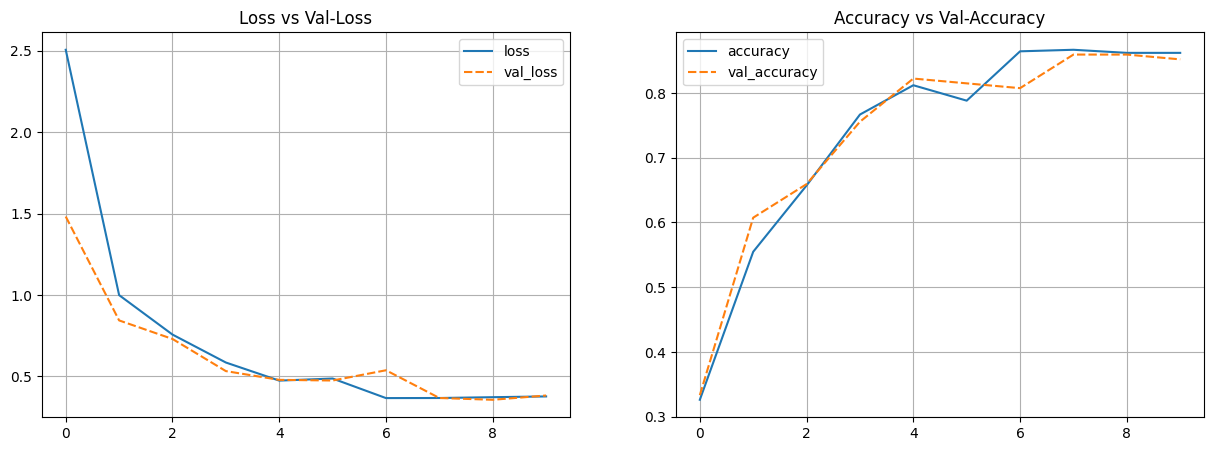

In [11]:
# Plot training results

history_aug_df = pd.DataFrame(history_aug.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_aug_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_aug_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Hasil dari model training kita menggambarkan grafik yang sudah cukup bagus dimana saat menyentuh epoch ke 10 loss val nya sudah dibawah 0.5 dan accuracy score nya hingga 0.85.

In [12]:
# Check the performance of test-set

## Get the probability
y_pred_prob_aug = model_aug.predict(test_set_aug) # Use test_set_aug instead of test_set
## Get class with maximum probability
y_pred_class_aug = np.argmax(y_pred_prob_aug, axis=-1)

## Display Classification Report
print(classification_report(test_set_aug.classes, y_pred_class_aug, target_names=np.array(list(train_set_aug.class_indices.keys()))))

8/8 [==============================] - 1s 82ms/step
              precision    recall  f1-score   support

  GarbageBag       0.85      0.91      0.88        75
    PaperBag       0.83      0.85      0.84        75
  PlasticBag       0.84      0.76      0.80        75

    accuracy                           0.84       225
   macro avg       0.84      0.84      0.84       225
weighted avg       0.84      0.84      0.84       225



Setelah kita coba pada data test, memberikan hasil yang kurang lebih sama yaitu accuracy score masih berada di rentang 0.84. Kita akan coba improve akurasi model di model improvement.

## **vii. ANN Improvement (Sequential API)**

### **vii.1 Model Definition**

In [16]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API model

model_tl = Sequential()
model_tl.add(tf.keras.layers.InputLayer(input_shape=(224, 224, 3)))
model_tl.add(pretrained_model)

model_tl.add(Flatten())
model_tl.add(Dense(512, activation='relu'))
model_tl.add(Dense(6, activation='softmax'))

# Compile
model_tl.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_tl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 27563334 (105.15 MB)
Trainable params: 12848646 (49.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### **vii.2 Model Training**

In [17]:
# Train the model

%%time
history_tl = model_tl.fit(train_set_tl, epochs=10, validation_data=val_set_tl, batch_size=batch_size)

Epoch 1/10
12/12 [==============================] - 42s 3s/step - loss: 32.1200 - accuracy: 0.6435 - val_loss: 8.9456 - val_accuracy: 0.8889
Epoch 2/10
12/12 [==============================] - 15s 1s/step - loss: 8.0324 - accuracy: 0.9088 - val_loss: 5.8587 - val_accuracy: 0.9397
Epoch 3/10
12/12 [==============================] - 15s 1s/step - loss: 3.5998 - accuracy: 0.9510 - val_loss: 4.5328 - val_accuracy: 0.9397
Epoch 4/10
12/12 [==============================] - 15s 1s/step - loss: 1.4664 - accuracy: 0.9728 - val_loss: 7.1915 - val_accuracy: 0.9111
Epoch 5/10
12/12 [==============================] - 17s 1s/step - loss: 1.4839 - accuracy: 0.9714 - val_loss: 5.2789 - val_accuracy: 0.9175
Epoch 6/10
12/12 [==============================] - 15s 1s/step - loss: 1.1912 - accuracy: 0.9796 - val_loss: 5.6402 - val_accuracy: 0.9302
Epoch 7/10
12/12 [==============================] - 15s 1s/step - loss: 0.5789 - accuracy: 0.9850 - val_loss: 4.9712 - val_accuracy: 0.9365
Epoch 8/10
12/12 [=

### **vii.3 Model Evaluation**

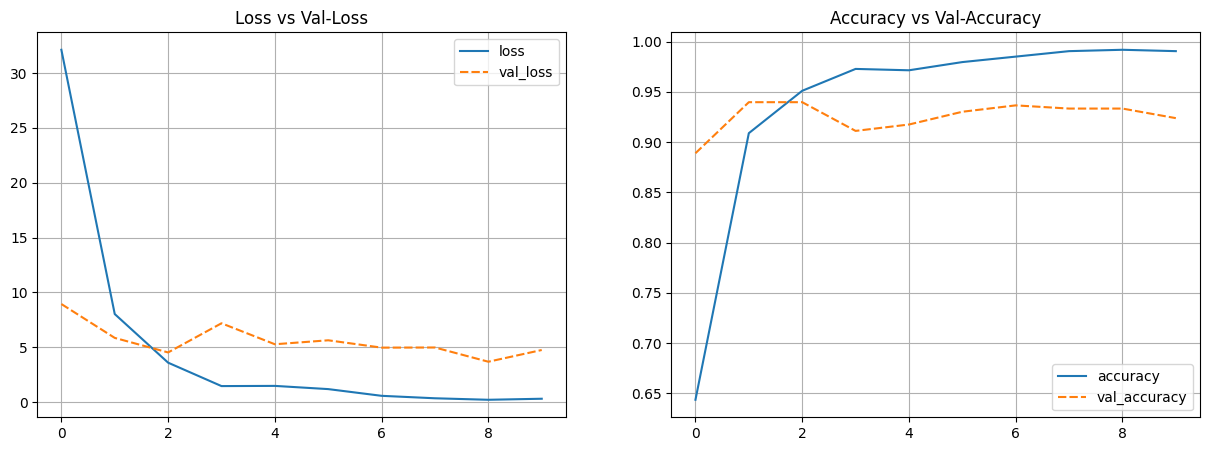

In [18]:
# Plot training results

history_tl_df = pd.DataFrame(history_tl.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_tl_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_tl_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Untuk hasil dari model improvement terlihat model kita sedikit mengalami overfit dimana accuracy nya mencapai 0.99 tetapi valnya berada di 0.92. Akan tetapi, untuk overall performa model dengan data trainnya masih sangat baik yaitu menyentu 0.90 an keatas.

In [19]:
# Check the performance of test-set

## Get the probability
y_pred_prob_tl = model_tl.predict(test_set_tl) # Use test_set_tl instead of test_set
## Get class with maximum probability
y_pred_class_tl = np.argmax(y_pred_prob_tl, axis=-1)

## Display Classification Report
print(classification_report(test_set_tl.classes, y_pred_class_tl, target_names=np.array(list(train_set_tl.class_indices.keys()))))

4/4 [==============================] - 8s 2s/step
              precision    recall  f1-score   support

  GarbageBag       0.99      0.95      0.97        75
    PaperBag       0.90      0.96      0.93        75
  PlasticBag       0.92      0.89      0.91        75

    accuracy                           0.93       225
   macro avg       0.93      0.93      0.93       225
weighted avg       0.93      0.93      0.93       225



Setelah kita cek dengan test set, hasilnya malah lebih baik 1% yaitu menyentuh angka accuracy score 0.93. Dengan begitu bisa ditarik kesimpulan bahwa model sudah cukup baik dalam mendeteksi object dari dataset kita yaitu antara paper bag, plastic bag, maupun garbage bag.

## **vii. Model Saving**

Setelah kita mendapat model terbaik kita, selanjutnya akan kita save untuk kita tes modelnya pada model inference.

In [20]:
# Menyimpan model beserta bobotnya dalam format H5
model_tl.save('model_terbaiks.h5')

Diatas menyimpan model pada direktori colab, sedangkan dibawah menyimpan model terbaik di dalam gdrive agar lebih mudah digunakan di colab lain.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

# Simpan model ke Google Drive
model_tl.save('/content/drive/My Drive/model_terbaiks.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **ix. Model Inference**

Dibawah merupakan gambar-gambar yang akan kita gunakan untuk testing model kita.

### **ix.1 Gambar Test 1**

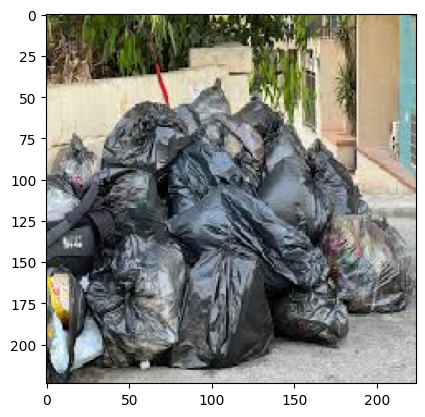

In [4]:
img_path = '/content/sampah.jpeg'
img = image.load_img(img_path, target_size=(224, 224))  # Ukuran model kita 224 x 224
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

### **ix.2 Gambar Test 2**

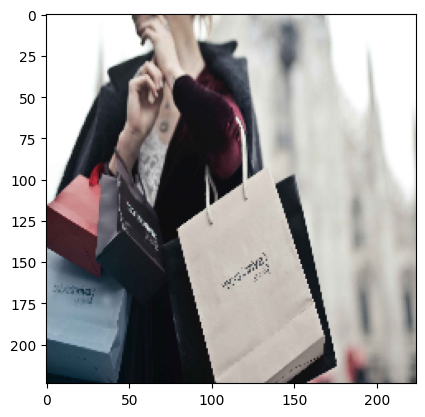

In [5]:
img_path = '/content/kelebihan-paper-bag.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Ukuran model kita 224 x 224
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

### **ix.3 Gambar Test 3**

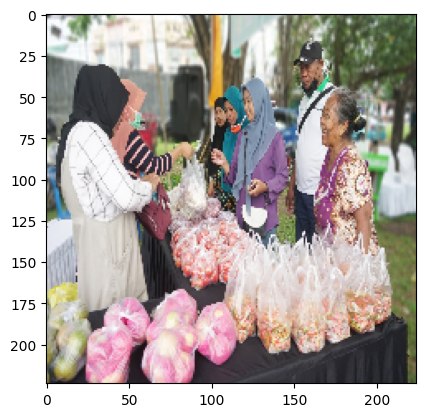

In [6]:
img_path = '/content/FA-PLASTIK.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Ukuran model kita 224 x 224
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.show()

## **x. Pengambilan Kesimpulan**

Untuk merangkup apa saja yang telah kita lakukan diatas, berikut merupakan point-pointnya:

- Dari EDA kita sudah dapat melihat bahwa pembagian antar 3 class dalam dataset kita balance dimana tiap class masing masing memiliki 500 data sehingga keseluruhan dari data yang kita miliki adalah 1500.

- Karakteristik dari masing-masing class dapat terlihat gambarnya sama-sama berada di posisi yang tidak beraturan, dengan begitu kita melakukan augmentasi supaya model dapat lebih jelas mempelajari pola dari masing-masing class.

- Terlihat untuk plastic bag memiliki variasi yang cukup beragam dimana warnanya berbeda-beda, dan juga bentuknya memiliki selalu memiliki 2 pegangan. Untuk paper bag, semuanya berwarna coklat dan memiliki bentuk persegi panjang, dan untuk garbage bag semua berwarna hitam, dan memiliki bentuk semi-oval tidak beraturan.

- Untuk colorspace yang didapatkan pada data kita setelah dilakukan cek colorspace menggunakan fungsi yang kita buat, didapatkan dataset kita RGB.

- Terlihat pada model training kita sudah memiliki performa model yang cukup baik yaitu 0.85 pada test set, akan tetapi setelah kita lakukan transfer learning menggunakan VGG16 pada model improvement didapatkan kenaikan performa model sebesar 8% dimana acuraccy score untuk model terbaik kita berada diangka 0.93.

- Masih banyak hal yang bisa kita lakukan dalam mengimprove model yang kita miliki, salah satunya yaitu penentuan layers yang baik, dan juga penggunaan epoch yang lebih banyak sehingga kita bisa lebih mengetahui performa secara general model kita. Untuk selebihnya mungkin bisa memperbanyak gambar yang ada didataset sehingga ada beberapa contoh gambar asli sehingga model dapat lebih mempelajari object secara real.

- Bisa kita lihat gambar-gambar yang ada didataset kita kebanyakan merupakan gambar buatan, sehingga background dan foregroundnya sangat kontras yang bisa saja membuat model kita overfit.